In [2]:
from py2neo import Graph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from dask import delayed, compute
import dask
import dask.dataframe as dd
import numpy as np

In [3]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "1234"))

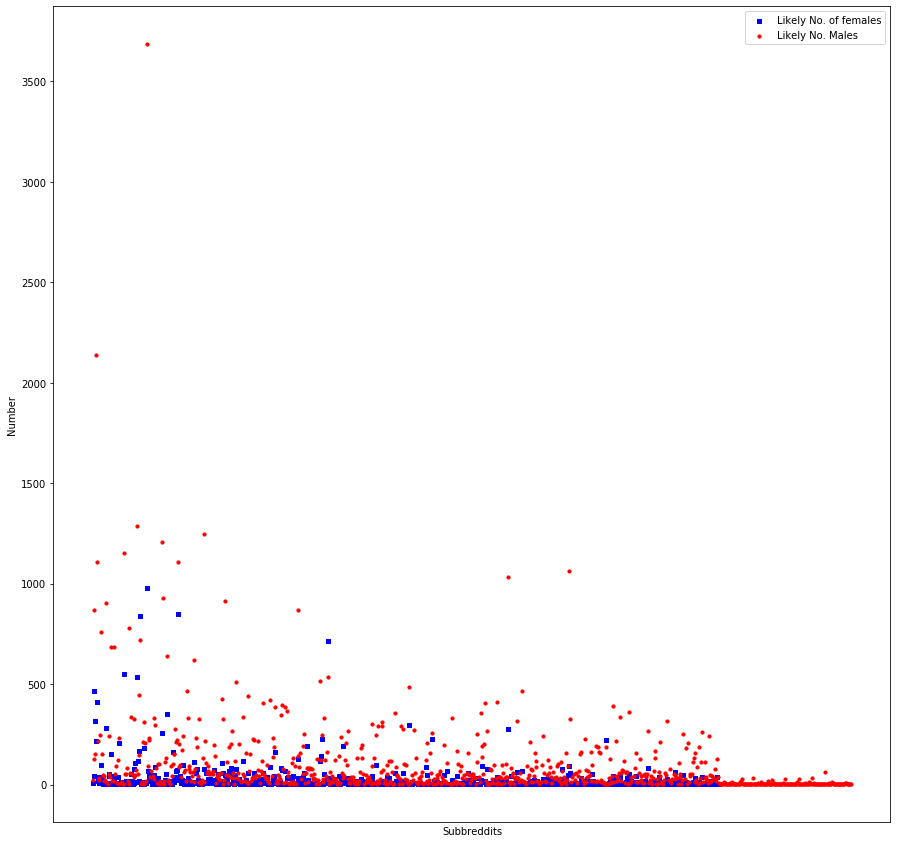

In [163]:
row=graph.run("match (sr: SubReddit)-[r:targets]->(tr: SubReddit) return sr.id, (r.textProp[22]+r.textProp[26]+r.textProp[27]+r.textProp[28])/4 as F,(r.textProp[37]+r.textProp[30]+r.textProp[24]+r.textProp[25])/4 as M, tr.id limit 100000").to_data_frame()
df=pd.DataFrame(row)
ddf = dd.from_pandas(df, npartitions=8)
ddf['gender']=0
str(ddf['gender'])
ddf['gender'] = ddf['gender'].mask(ddf.F >= ddf.M, 'Female').compute()
ddf['gender'] = ddf['gender'].mask(ddf.F < ddf.M, 'Male').compute()
count1=ddf[ddf['gender'] == 'Female'].groupby(['sr.id','gender']).count().compute().reset_index()
count2=ddf[ddf['gender'] == 'Male'].groupby(['sr.id','gender']).count().compute().reset_index()
final_df= dd.merge(count1[['sr.id','F']], count2[['sr.id','M']], left_on='sr.id', right_on='sr.id')
sorted_final_df = final_df.sort_values(['F'], ascending=False)

test=count1.sum(axis = 0, skipna = True) 
test1=count2.sum(axis = 0, skipna = True) 



plt.rcParams['figure.figsize'] = [15,15]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(count1['sr.id'], count1['F'], s=10, c='b', marker="s", label='Likely No. of females')
ax1.scatter(count2['sr.id'],count2['M'], s=10, c='r', marker="o", label='Likely No. Males')
plt.legend(loc='upper right');

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("Subbreddits")
plt.ylabel("Number")
plt.show()

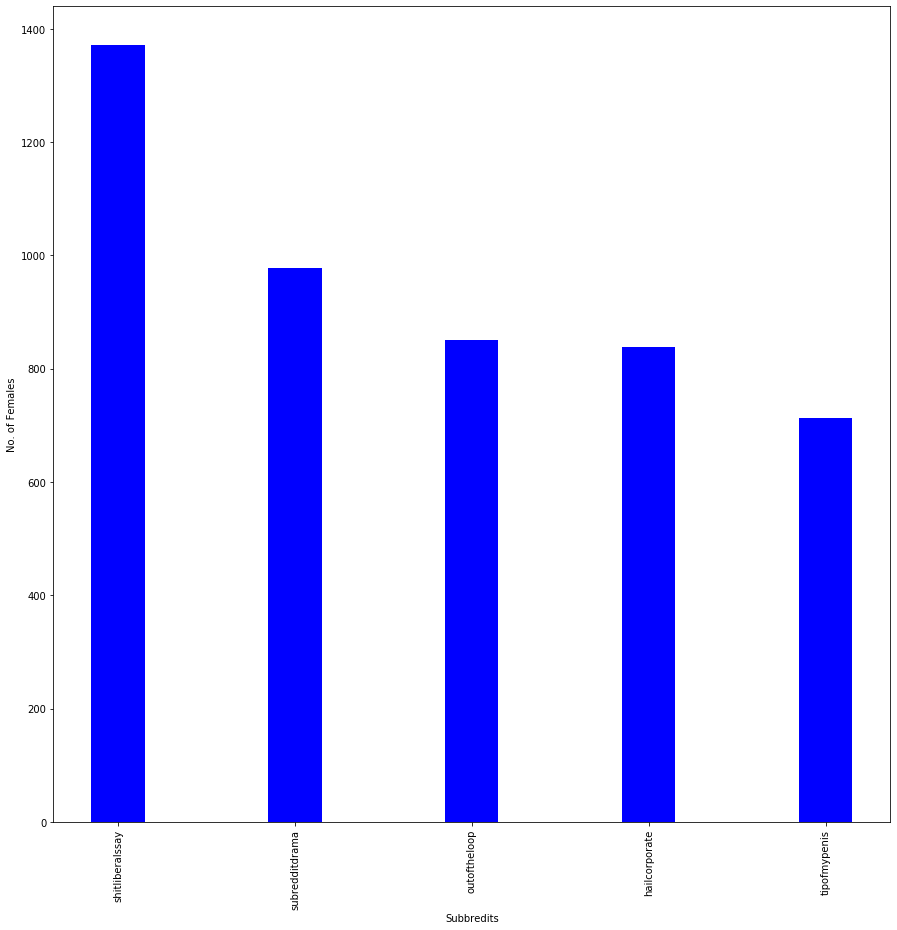

In [151]:
row=graph.run("match (sr: SubReddit)-[r:targets]->(tr: SubReddit) return sr.id, (r.textProp[22]+r.textProp[26]+r.textProp[27]+r.textProp[28])/4 as F,(r.textProp[37]+r.textProp[30]+r.textProp[24]+r.textProp[25])/4 as M, tr.id").to_data_frame()
df=pd.DataFrame(row)
ddf = dd.from_pandas(df, npartitions=8)
ddf['gender']=0
str(ddf['gender'])
ddf['gender'] = ddf['gender'].mask(ddf.F >= ddf.M, 'Female').compute()
ddf['gender'] = ddf['gender'].mask(ddf.F < ddf.M, 'Male').compute()
count1=ddf[ddf['gender'] == 'Female'].groupby(['sr.id','gender']).count().compute().reset_index()
count2=ddf[ddf['gender'] == 'Male'].groupby(['sr.id','gender']).count().compute().reset_index()
final_df= dd.merge(count1[['sr.id','F']], count2[['sr.id','M']], left_on='sr.id', right_on='sr.id')
sorted_final_df = final_df.sort_values(['F'], ascending=False)

test=count1.sum(axis = 0, skipna = True) 
test1=count2.sum(axis = 0, skipna = True) 



ax = plt.subplot(111)
w = 0.3

ax.bar(sorted_final_df['sr.id'][:5], sorted_final_df['F'][:5], width=w, color='b', align='center')
#ax.bar(sorted_final_df['sr.id'], sorted_final_df['M'], width=w, color='g', align='center')

ax.autoscale(tight=False)
plt.xticks(rotation=90)
plt.ylabel("Likely No. of Females")
plt.xlabel("Subbredits")
plt.show()


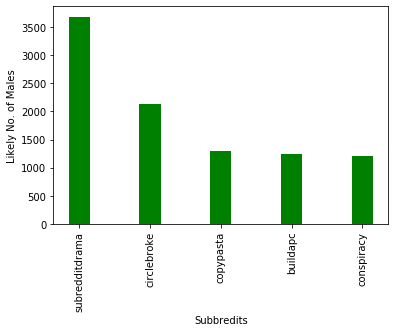

In [60]:
row=graph.run("match (sr: SubReddit)-[r:targets]->(tr: SubReddit) return sr.id, (r.textProp[22]+r.textProp[26]+r.textProp[27]+r.textProp[28])/4 as F,(r.textProp[37]+r.textProp[30]+r.textProp[24]+r.textProp[25])/4 as M, tr.id").to_data_frame()
df=pd.DataFrame(row)
ddf = dd.from_pandas(df, npartitions=8)
ddf['gender']=0
str(ddf['gender'])
ddf['gender'] = ddf['gender'].mask(ddf.F >= ddf.M, 'Female').compute()
ddf['gender'] = ddf['gender'].mask(ddf.F < ddf.M, 'Male').compute()
count1=ddf[ddf['gender'] == 'Female'].groupby(['sr.id','gender']).count().compute().reset_index()
count2=ddf[ddf['gender'] == 'Male'].groupby(['sr.id','gender']).count().compute().reset_index()
final_df= dd.merge(count1[['sr.id','F']], count2[['sr.id','M']], left_on='sr.id', right_on='sr.id')
sorted_final_df = final_df.sort_values(['M'], ascending=False)

test=count1.sum(axis = 0, skipna = True) 
test1=count2.sum(axis = 0, skipna = True) 



ax = plt.subplot(111)
w = 0.3

#ax.bar(sorted_final_df['sr.id'], sorted_final_df['F'], width=w, color='b', align='center')
ax.bar(sorted_final_df['sr.id'][:5], sorted_final_df['M'][:5], width=w, color='g', align='center')

ax.autoscale(tight=False)
plt.xticks(rotation=90)
plt.ylabel("Likely No. of Males")
plt.xlabel("Subbredits")
plt.show()

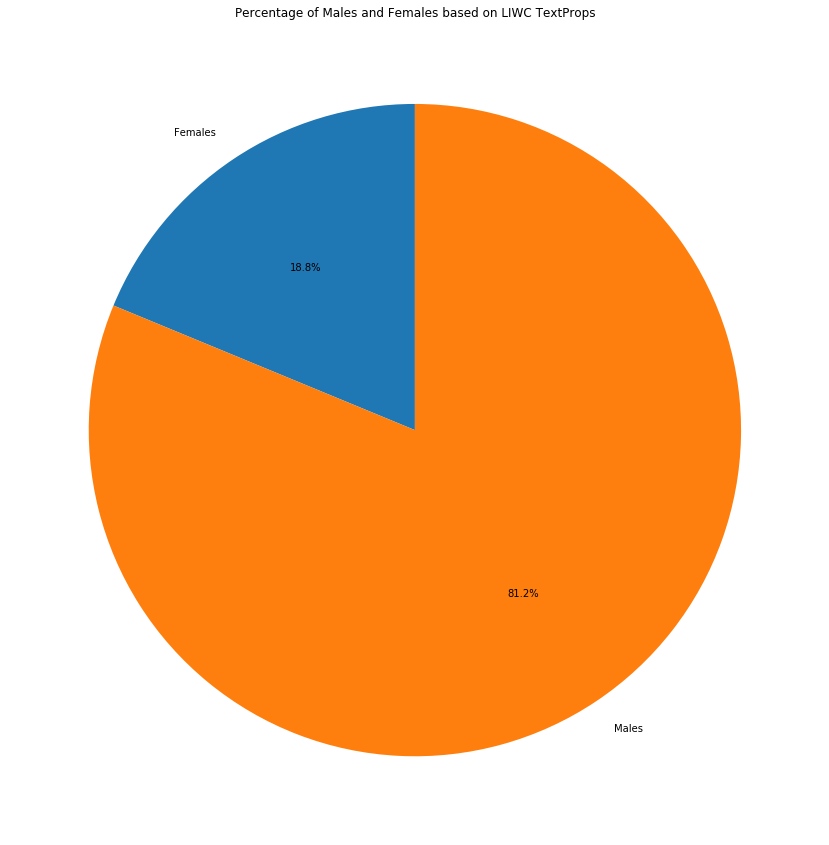

In [137]:
row=graph.run("match (sr: SubReddit)-[r:targets]->(tr: SubReddit) return sr.id, (r.textProp[22]+r.textProp[26]+r.textProp[27]+r.textProp[28])/4 as F,(r.textProp[37]+r.textProp[30]+r.textProp[24]+r.textProp[25])/4 as M, tr.id").to_data_frame()
df=pd.DataFrame(row)
ddf = dd.from_pandas(df, npartitions=8)
ddf['gender']=0
str(ddf['gender'])
ddf['gender'] = ddf['gender'].mask(ddf.F >= ddf.M, 'Female').compute()
ddf['gender'] = ddf['gender'].mask(ddf.F < ddf.M, 'Male').compute()
count1=ddf[ddf['gender'] == 'Female'].groupby(['sr.id','gender']).count().compute().reset_index()
count2=ddf[ddf['gender'] == 'Male'].groupby(['sr.id','gender']).count().compute().reset_index()
final_df= dd.merge(count1[['sr.id','F']], count2[['sr.id','M']], left_on='sr.id', right_on='sr.id')
sorted_final_df = final_df.sort_values(['F'], ascending=False)

test=count1.sum(axis = 0, skipna = True) 
test1=count2.sum(axis = 0, skipna = True) 
total=[test.F,test1.M]
label=['Females','Males']
plt.pie(total, labels=label, startangle=90, autopct='%.1f%%')
plt.title('Percentage of Males and Females based on LIWC TextProps')
plt.show()
#https://www.techjunkie.com/demographics-reddit/#Age_and_Gender   71% males use Reddit the results we are getting are close for subbreddits example circlejerkcopypasta has 70%males .

In [106]:
row=graph.run("match (s1:SubReddit)-[r:targets]->(t1:SubReddit) return s1.id, r.textProp[72] as Motion,r.textProp[49] as negemo,r.textProp[61] as exclusion,r.textProp[24] as firstperson").to_data_frame()
df=pd.DataFrame(row)
ddf = dd.from_pandas(df, npartitions=8)
motion_mean=ddf["Motion"].mean().compute()
negemo_mean=ddf["negemo"].mean().compute()
exclusion_mean=ddf["exclusion"].mean().compute()
firstperson_mean=ddf["firstperson"].mean().compute()


,s1.id,Motion,negemo,exclusion,firstperson
0,karthusmains,0.000000,0.007299,0.029197,0.014599
1,dirtysionmains,0.000000,0.008772,0.035088,0.008772
2,sivir,0.000000,0.008772,0.035088,0.008772
3,braummains,0.000000,0.008772,0.035088,0.008772
4,reksaimains,0.000000,0.007299,0.029197,0.014599
...,...,...,...,...,...
286556,subredditoftheday,0.013746,0.006873,0.027491,0.044674
286557,tipofmypenis,0.000000,0.032258,0.032258,0.032258
286558,cockhero,0.033333,0.000000,0.033333,0.033333
286559,daddyofive,0.012500,0.056250,0.018750,0.031250


In [108]:
ddf['deceptive']=0
str(ddf['deceptive'])
filter_mean=((ddf.Motion >= motion_mean) | (ddf.negemo>=negemo_mean)) & ((ddf.exclusion<=exclusion_mean) | (ddf.firstperson<=firstperson_mean))
filter1_mean=((ddf.Motion <= motion_mean) | (ddf.negemo<=negemo_mean)) & ((ddf.exclusion>=exclusion_mean) | (ddf.firstperson>=firstperson_mean))
ddf['deceptive'] = ddf['deceptive'].mask(filter_mean, 'Deceptive').compute()
ddf['deceptive'] = ddf['deceptive'].mask(filter1_mean, 'Not Deceptive').compute()
count1=ddf[ddf['deceptive'] == 'Deceptive'].groupby(['s1.id']).count().compute().reset_index()
count2=ddf[ddf['deceptive'] == 'Not Deceptive'].groupby(['s1.id']).count().compute().reset_index()

count2

,s1.id,Motion,negemo,exclusion,firstperson,deceptive
0,1984isreality,2,2,2,2,2
1,2007scape,76,76,76,76,76
2,2ne1,2,2,2,2,2
3,300blk,7,7,7,7,7
4,30rock,1,1,1,1,1
...,...,...,...,...,...,...
18138,zangames,1,1,1,1,1
18139,zapier,1,1,1,1,1
18140,zika_virus,1,1,1,1,1
18141,zines,1,1,1,1,1


In [112]:
plt.rcParams['figure.figsize'] = [15,15]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(count1['s1.id'], count1['deceptive'], s=10, c='b', marker="s", label='Likely to be deceptive')
ax1.scatter(count2['s1.id'],count2['deceptive'], s=10, c='r', marker="o", label='Likely not deceptive')
plt.legend(loc='upper right');

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("Subbreddits")
plt.ylabel("Number")
plt.show()

KeyboardInterrupt: 

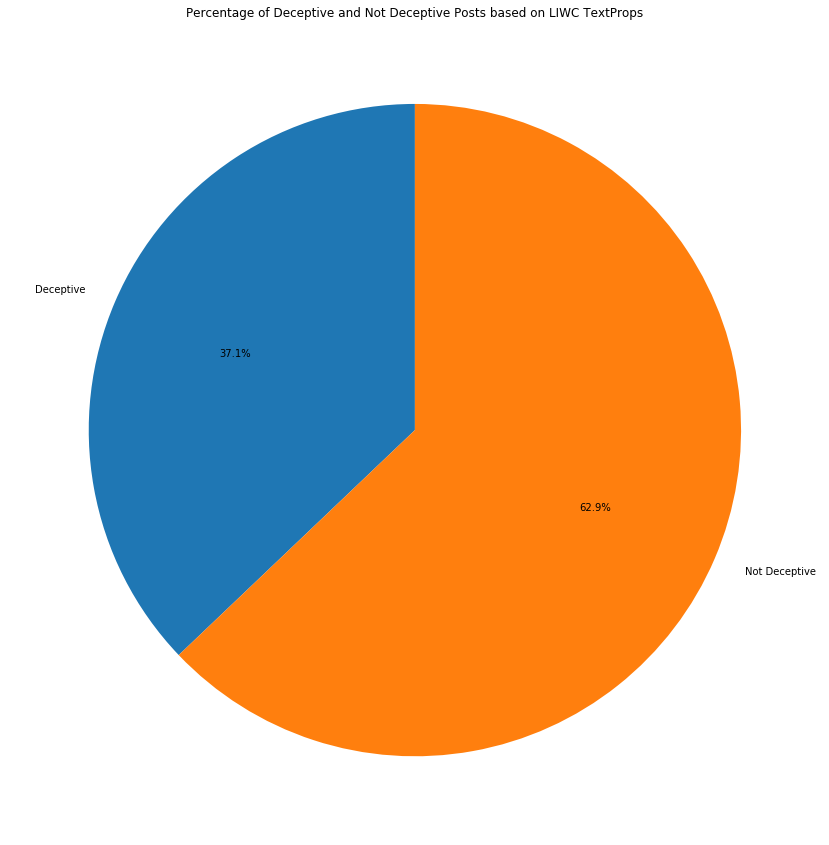

In [109]:
test=count1.sum(axis = 0, skipna = True) 
test1=count2.sum(axis = 0, skipna = True) 
total=[test.deceptive,test1.deceptive]
label=['Deceptive','Not Deceptive']
plt.pie(total, labels=label, startangle=90, autopct='%.1f%%')
plt.title('Percentage of Deceptive and Not Deceptive Posts based on LIWC TextProps')
plt.show()

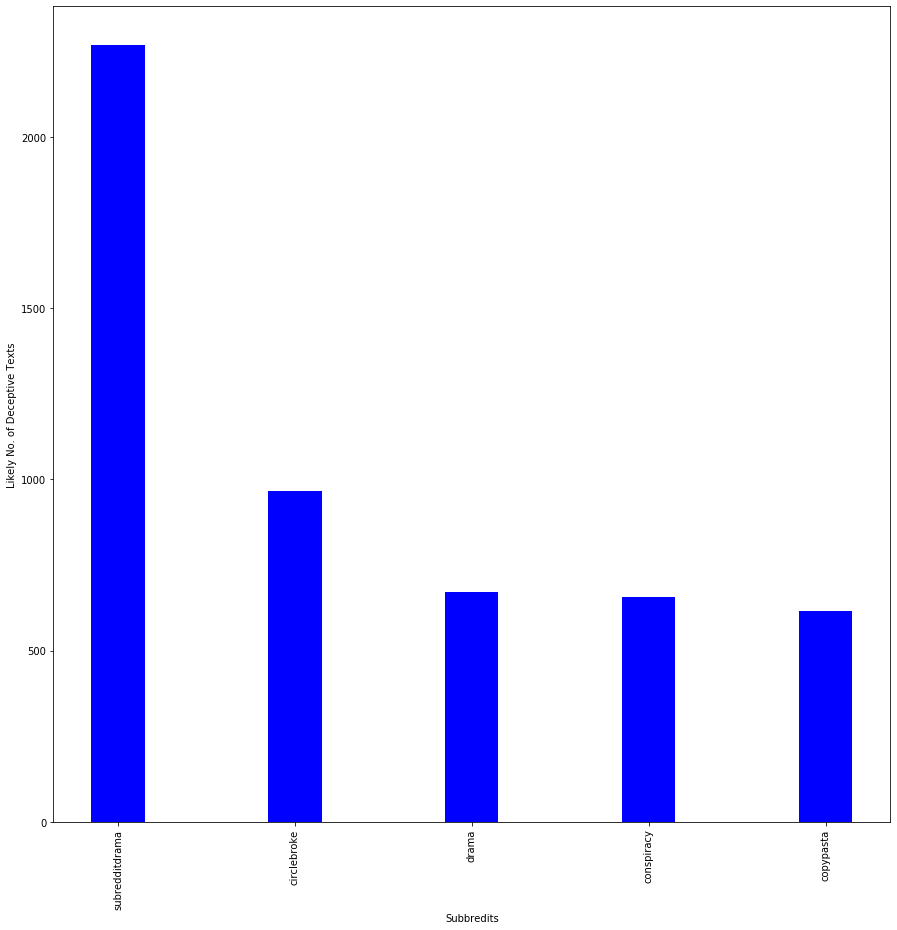

In [110]:
sorted_final_df = count1.sort_values(['deceptive'], ascending=False)
ax = plt.subplot(111)
w = 0.3

ax.bar(sorted_final_df['s1.id'][:5], sorted_final_df['deceptive'][:5], width=w, color='b', align='center')
#ax.bar(sorted_final_df['sr.id'], sorted_final_df['M'], width=w, color='g', align='center')

ax.autoscale(tight=False)
plt.xticks(rotation=90)
plt.ylabel("Likely No. of Deceptive Texts")
plt.xlabel("Subbredits")
plt.show()

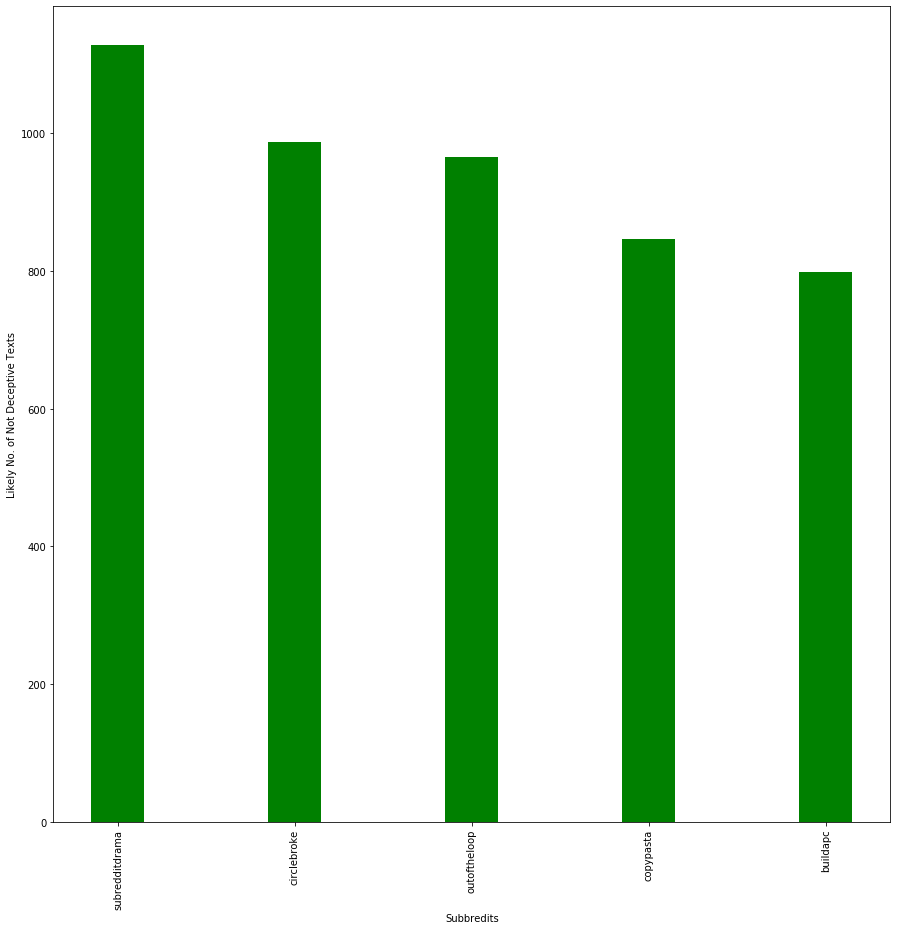

In [111]:
sorted_final_df = count2.sort_values(['deceptive'], ascending=False)
ax = plt.subplot(111)
w = 0.3

ax.bar(sorted_final_df['s1.id'][:5], sorted_final_df['deceptive'][:5], width=w, color='g', align='center')
#ax.bar(sorted_final_df['sr.id'], sorted_final_df['M'], width=w, color='g', align='center')

ax.autoscale(tight=False)
plt.xticks(rotation=90)
plt.ylabel("Likely No. of Not Deceptive Texts")
plt.xlabel("Subbredits")
plt.show()

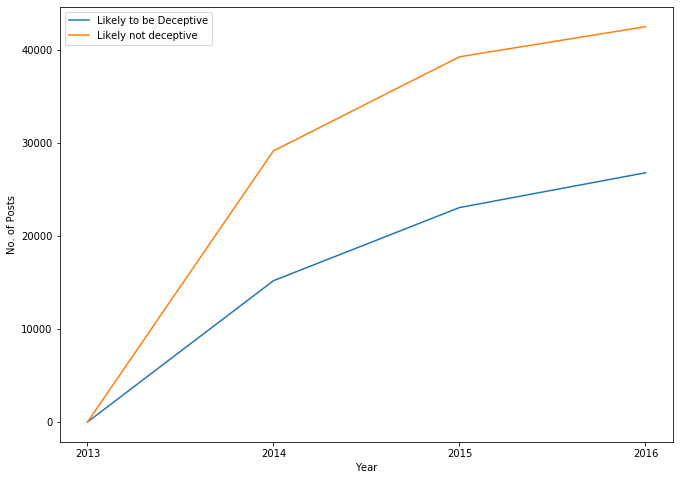

Wall time: 45.9 s


In [21]:
%%time
row=graph.run("match (s1:SubReddit)-[r:targets]->(t1:SubReddit) return s1.id, apoc.temporal.format(r.timestamp, 'yyyy') AS year,r.textProp[72] as Motion,r.textProp[49] as negemo,r.textProp[61] as exclusion,r.textProp[24] as firstperson").to_data_frame()
df=pd.DataFrame(row)
df = df[df.year!='2017']
ddf = dd.from_pandas(df, npartitions=8)
motion_mean=ddf["Motion"].mean().compute()
negemo_mean=ddf["negemo"].mean().compute()
exclusion_mean=ddf["exclusion"].mean().compute()
firstperson_mean=ddf["firstperson"].mean().compute()
ddf['deceptive']=0
str(ddf['deceptive'])
filter_mean=((ddf.Motion >= motion_mean) | (ddf.negemo>=negemo_mean)) & ((ddf.exclusion<=exclusion_mean) | (ddf.firstperson<=firstperson_mean))
filter1_mean=((ddf.Motion <= motion_mean) | (ddf.negemo<=negemo_mean)) & ((ddf.exclusion>=exclusion_mean) | (ddf.firstperson>=firstperson_mean))
ddf['deceptive'] = ddf['deceptive'].mask(filter_mean, 'Deceptive').compute()
ddf['deceptive'] = ddf['deceptive'].mask(filter1_mean, 'Not Deceptive').compute()
counttime=ddf[ddf['deceptive'] == 'Deceptive'].groupby(['year']).count().compute().reset_index()
counttime2=ddf[ddf['deceptive'] == 'Not Deceptive'].groupby(['year']).count().compute().reset_index()
sorted1 = counttime.sort_values(['year'], ascending=True)
sorted2 = counttime2.sort_values(['year'], ascending=True)


fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)
ax1.plot(sorted1['year'], sorted1['deceptive'], label='Likely to be Deceptive')
ax1.plot(sorted2['year'], sorted2['deceptive'], label='Likely not deceptive')
ax1.legend(loc=2)

plt.ylabel("No. of Posts")
plt.xlabel("Year")
plt.show()

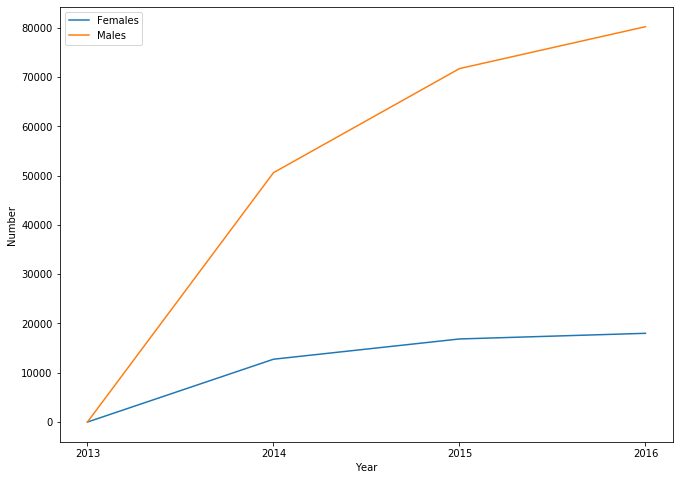

Wall time: 38.7 s


In [20]:
%%time

row=graph.run("match (sr: SubReddit)-[r:targets]->(tr: SubReddit) return sr.id,apoc.temporal.format(r.timestamp, 'yyyy') AS year, (r.textProp[22]+r.textProp[26]+r.textProp[27]+r.textProp[28])/4 as F,(r.textProp[37]+r.textProp[30]+r.textProp[24]+r.textProp[25])/4 as M, tr.id").to_data_frame()
df=pd.DataFrame(row)
df = df[df.year!='2017']
ddf = dd.from_pandas(df, npartitions=8)
ddf['gender']=0
str(ddf['gender'])
ddf['gender'] = ddf['gender'].mask(ddf.F >= ddf.M, 'Female').compute()
ddf['gender'] = ddf['gender'].mask(ddf.F < ddf.M, 'Male').compute()
count1time=ddf[ddf['gender'] == 'Female'].groupby(['year']).count().compute().reset_index()
count2time=ddf[ddf['gender'] == 'Male'].groupby(['year']).count().compute().reset_index()
sorted1time = count1time.sort_values(['year'], ascending=True)
sorted2time = count2time.sort_values(['year'], ascending=True)



fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)
ax1.plot(sorted1time['year'], sorted1time['F'], label='Females')
ax1.plot(sorted2time['year'], sorted2time['M'], label='Males')
ax1.legend(loc=2)

plt.ylabel("Number")
plt.xlabel("Year")
plt.show()